In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

### Function

co_ordinates: inputs a n x 2 numpy array where x(n, 1) = X value and x(n, 2) = y value

In [148]:
class LS(object):
    
    '''
    Input: takes a nx2 numpy array of X and y co-ordinates
    Output: returns the least squares value of m and b for y=mx+b
    Formula used: A^T.Ax = A^T.b
    y = mx + b:
    self.eq_m returns the least squares "m" value
    self.eq_b returns the least squares "b" value
    '''
    
    def __init__(self, co_ordinates):
        
        self.co_ordinates = co_ordinates
        self.get_matrices()
        self.get_co_ordinates()
        
    def fit(self):
        
        # set up the augmented matrix as A^T.A | A^T.b
        augm = np.column_stack((np.dot(self.A_transpose, self.A), np.dot(self.A_transpose, self.b)))

        # solve for rref
        self.rref_ = sp.Matrix(augm).rref()
        output = np.array(self.rref_[0])[:, 2]
        self.m_ = output[0]
        self.b_ = output[1]
        
        self.performance_metrics()
        
    def plot_ls(self, xylim=0, x_line_plot_range=100):
        
        '''
        Plots the co-ordinates and also the least squares equation line on a graph
        xylim = the size of the graph
        x_line_plot_range = length of the least squares line
        '''
        x_range = np.arange(-x_line_plot_range, x_line_plot_range)
        fix, ax = plt.subplots()
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_position('zero')
        ax.spines['top'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.plot(self.X_, self.y_, 'ro', x_range, self.m_*x_range + self.b_, 'b-')
        plt.xlim(xylim)
        plt.ylim(xylim)
        plt.show()
        
    def plot_points(self, xylim=0):
        '''
        Plots the co-ordinates on a graph
        '''
        fig, ax = plt.subplots()
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_position('zero')
        ax.spines['top'].set_position('zero')
        ax.spines['bottom'].set_position('zero')
        ax.plot(self.X_, self.y_, 'ro')
        ax.set_xlim(xylim)
        ax.set_ylim(xylim)
        plt.show()
        
    def get_matrices(self):
        
        self.A = []
        self.b = []
        for x, y in zip(self.co_ordinates[:, 0], self.co_ordinates[:, 1]):
            self.A += [[x, 1]]
            self.b += [[y]]
        self.A = np.matrix(self.A)
        self.b = np.matrix(self.b)
        self.A_transpose = self.A.transpose()

    def get_co_ordinates(self):
        X, y = zip(*self.co_ordinates)
        self.X_ = np.array(X)
        self.y_ = np.array(y)
        
    def performance_metrics(self):
        point_x, point_y = zip(*self.co_ordinates)
        ls_y = np.dot(np.array(point_x), self.m_) + self.b_
        self.sse_ = ((np.array(point_y) - ls_y)**2).sum()
        self.sst_ = ((np.array(point_y) - np.array(point_x).mean())**2).sum()
        self.rsquared_ = 1 - (self.sse_/self.sst_)

In [142]:
x1 = np.array([-1, 0])
x2 = np.array([0, 1])
x3 = np.array([1, 2])
x4 = np.array([2, 1])
input_array = np.array([x1, x2, x3, x4])

In [143]:
ls = LS(input_array)

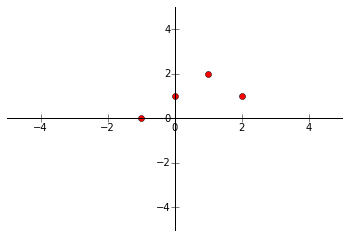

In [144]:
ls.plot_points((-5,5))

In [145]:
ls.fit()

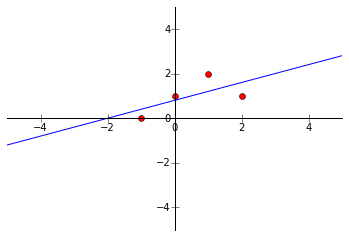

In [146]:
ls.plot_ls((-5,5), 10)

In [147]:
print("m: %.3f b: %.3f SSE: %.3f SST: %.3f R2: %.3f"%(ls.m_, ls.b_, ls.sse_, ls.sst_, ls.rsquared_))

m: 0.400 b: 0.800 SSE: 1.200 SST: 3.000 R2: 0.600
